(1)Examples with biological insights
(2) eSTRs effect on RNA Binding Proteins (RBPs)
(3)* eSTRs that overlap RBPs*
(4)eSTRs effects on transcription factors (TFs)
(5)*eSTRs that overlap transcrion factors*

In [ ]:
# Set up
%pylab inline
# Allow us to edit fonts in Illustrator
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True


In [1]:

# Libraries
import numpy as np
import os
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn.apionly as sns

# Path to data
RESDIR = "/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/"
DATA =  RESDIR+"SUMMARY/Merged_Causality_best_tissue.table"
BASEDIR = "/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/"
SNPS = "/storage/szfeupe/Runs/GTEx_estr/SNP_Analysis"
STRS = "/storage/szfeupe/Runs/GTEx_estr/Normalized_Genotypes/"
RNABP  =  "/storage/szfeupe/Runs/GTEx_estr/FEATURES/RnaBindProtDB_2012-11-21.csv"
TRFAC  =  "/storage/szfeupe/Runs/GTEx_estr/FEATURES/TF_gene_list"
COLOR = ['b', 'm', 'g', 'r', 'y', 'k', 'grey']

#--
def plotthat(Frame, BASEDIR):
    chs = list(Frame['chrom'])[0]
    gene = list(Frame['gene'])[0]
    start = list(Frame['best.str.start'])[0]
    tissue = list(Frame['best.tissue'])[0]
    score = list(Frame['best.score'])[0]
    
    snps=pd.read_csv(BASEDIR+tissue+"/SNP_Analysis/PQValues.txt", sep="\t",low_memory=False)
    expr = pd.read_csv(BASEDIR+tissue+"/Corr_Expr.csv",sep=',' ,low_memory=False) 
    snp =pd.read_csv(SNPS+"/SNP_raw_gt_"+chs, sep='\t',low_memory=False) #snps
    Genos=pd.read_csv(STRS+"STR_Raw_Gen."+chs, sep='\t',low_memory=False)
    #gene name
    S = snps.loc[snps['gene']==gene]['str.start']; snpstart=int(S)
    Gene = Gene_table.loc[Gene_table['gene']==gene]['gene.name'].values[0]
    print('\n----->',chs,' gene ',gene,'(',Gene,')  Causality Score: ',score,'\nCounts by SNP genotypes')
    
    #restrict to samples
    samples = list(expr.index)
    Genosnp = snp.loc[snp['start']==snpstart,samples]
    Genostr = Genos.loc[Genos['start']==start, samples]
    Genosnp = Genosnp.replace('None', np.nan) ; #print(Genosnp)
    Genostr = Genostr.replace('None', np.nan) ; #print(Genostr)
    #Expression
    Expr = expr[gene]
    
    #Figure    (1) STR vs EXPR
    plt.figure(figsize=(10,3))
    plt.subplot(131)
    plt.title(tissue+' tissue')
    plt.scatter(Genosnp, Expr, label='Lead SNP', color='b',marker='.')
    plt.ylabel(Gene+" expression")
    plt.xlabel("Best SNP genotypes")
    plt.subplot(132)
    plt.scatter(Genostr, Expr,label='eSTR', color='g',marker='.')
    #plt.ylabel(Gene+' Gene expression')
    plt.xlabel("eSTR genotypes \nSTR_"+str(int(start)))

    #Figure (2) Hold snp genotypes constant
    geno=list(set(Genosnp.values.tolist()[0]))
    geno=list(set([x for x in np.nan_to_num(geno) if x!='nan']))
    n=len(geno) ; N=0
    ind=Genosnp.index[0]
    #fig = plt.figure(figsize=(8,6))
    plt.subplot(133) #
    for i in range(n):
        S = Genosnp.T.loc[Genosnp.T[ind]==geno[i]]
        sample=list(S.index)
        S['Exp']=Expr.loc[sample]
        S['Str']=Genostr.T.loc[sample][Genostr.index[0]]
        S['Str'] = S['Str'].astype(float)
        S['Str']+=N
        if len(S['Exp'])==0:
            continue 
        print(geno[i], S.shape)
        plt.scatter(list(S['Str']), list(S['Exp']), color=COLOR[i], marker='.', s=8)
        #move start point for next genotype
        if max(list(S['Str'].values))-min(list(S['Str'].values))!=0:
            N += max(list(S['Str'].values))-min(list(S['Str'].values))+25
        else:
            N +=max(list(S['Str'].values))+25
        #print(N, list(S['Str']))
    plt.title("STR_%s at \nSNP %s:%s genotypes  "%(int(start), chs, str(snpstart)))
    plt.xlabel("Best SNP genotype")
    plt.xticks([])
    plt.show()
#END    

# Output path
OUTPATH = "pdfs"
PREFIX = "Figure1" # Keep as a variable in case we move things around!


** (1)  Examples with biological insights
                Exonic eSTRs with high causality

                     gene    best.q  best.score  best.str.start
171     ENSG00000160714.5  0.021260    0.524647     154531091.0
1370   ENSG00000153029.10  0.032861    0.470105     181025501.0
3004   ENSG00000144747.10  0.024460    0.409183      69025793.0
3016    ENSG00000181847.7  0.063461    0.164472     114049953.0
3439    ENSG00000254531.1  0.006696    0.176757     102268035.0
3751   ENSG00000164172.14  0.056726    0.102612      52405378.0
3819    ENSG00000169570.5  0.012377    0.264292     118341587.0
4937    ENSG00000104643.5  0.037517    0.181789      11183979.0
5803   ENSG00000137103.12  0.007813    0.831290      35854651.0
6281   ENSG00000176273.10  0.007988    0.183196      95667553.0
6396   ENSG00000172671.15  0.005047    0.169593      46090048.0
7079    ENSG00000134809.4  0.012069    0.498070      57295957.0
7269    ENSG00000257727.1  0.091076    0.111318      56623526.0
10280  ENSG00000108264.12  0.005047    0.225496      35850042.0
10342   ENSG00000196689.6  0.054577    0

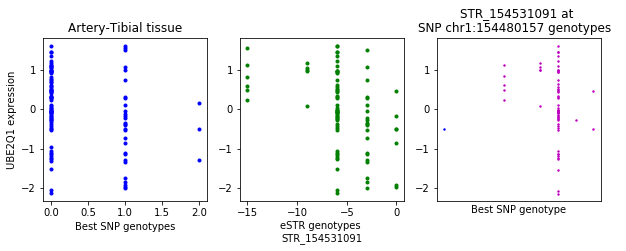


-----> chr1  gene  ENSG00000153029.10 ( MR1 )  Causality Score:  0.470105026093 
Counts by SNP genotypes
0 (92, 3)
1 (15, 3)


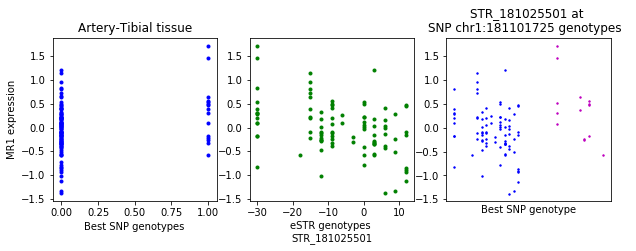


-----> chr3  gene  ENSG00000144747.10 ( TMF1 )  Causality Score:  0.409183130323 
Counts by SNP genotypes
2 (56, 3)
0 (10, 3)
1 (43, 3)


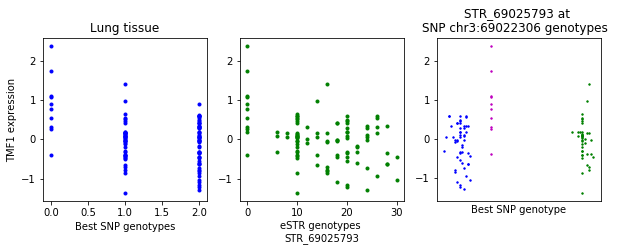


-----> chr3  gene  ENSG00000181847.7 ( TIGIT )  Causality Score:  0.164471890402 
Counts by SNP genotypes
2 (91, 3)
0 (3, 3)
1 (13, 3)


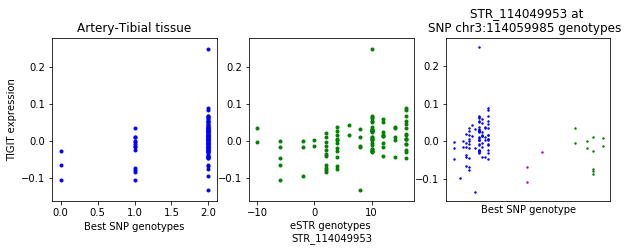


-----> chr4  gene  ENSG00000254531.1 ( AP001816.1 )  Causality Score:  0.176757148785 
Counts by SNP genotypes
2 (22, 3)
0 (66, 3)
1 (55, 3)


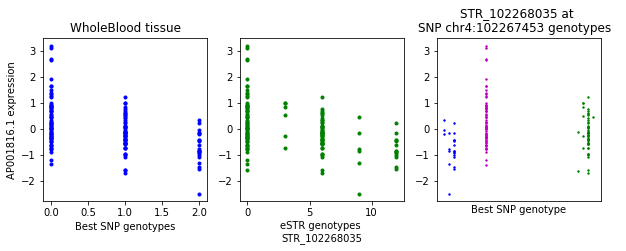


-----> chr5  gene  ENSG00000164172.14 ( MOCS2 )  Causality Score:  0.102611858484 
Counts by SNP genotypes
2 (22, 3)
3 (1, 3)
0 (64, 3)
1 (56, 3)


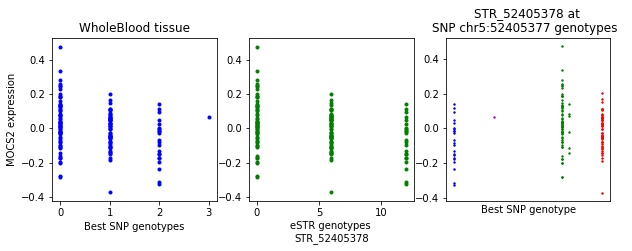


-----> chr5  gene  ENSG00000169570.5 ( DTWD2 )  Causality Score:  0.264291560714 
Counts by SNP genotypes
2 (4, 3)
0 (84, 3)
1 (36, 3)


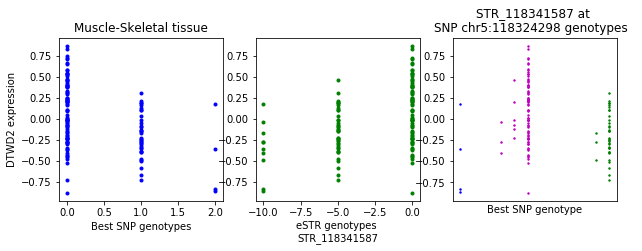


-----> chr8  gene  ENSG00000104643.5 ( MTMR9 )  Causality Score:  0.18178920578 
Counts by SNP genotypes
2 (34, 3)
0 (42, 3)
1 (67, 3)


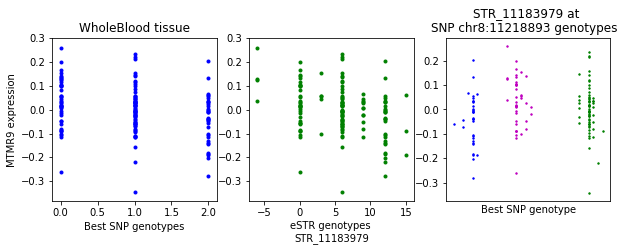


-----> chr9  gene  ENSG00000137103.12 ( TMEM8B )  Causality Score:  0.831290257122 
Counts by SNP genotypes
2 (11, 3)
0 (50, 3)
1 (46, 3)


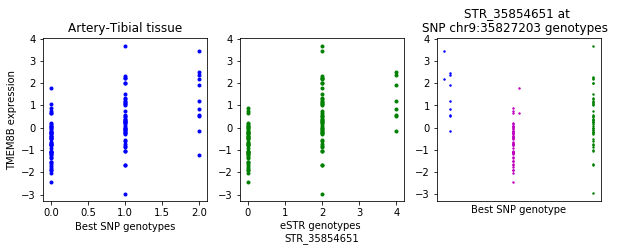


-----> chr10  gene  ENSG00000176273.10 ( SLC35G1 )  Causality Score:  0.183195759415 
Counts by SNP genotypes
2 (27, 3)
0 (35, 3)
1 (65, 3)


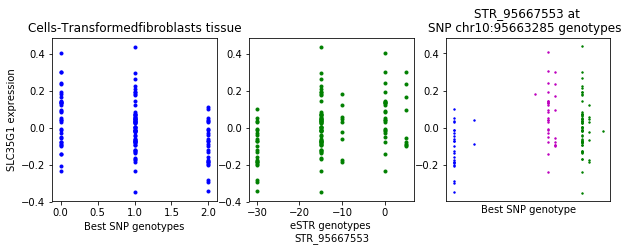


-----> chr10  gene  ENSG00000172671.15 ( ZFAND4 )  Causality Score:  0.169593273542 
Counts by SNP genotypes
2 (1, 3)
0 (107, 3)
1 (19, 3)


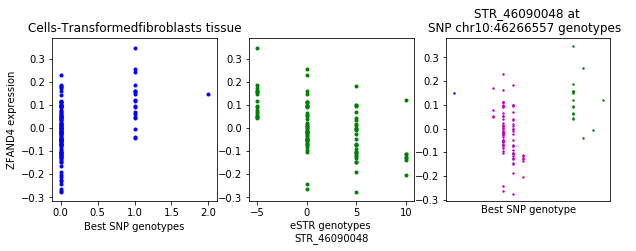


-----> chr11  gene  ENSG00000134809.4 ( TIMM10 )  Causality Score:  0.498069824772 
Counts by SNP genotypes
2 (72, 3)
0 (7, 3)
1 (45, 3)


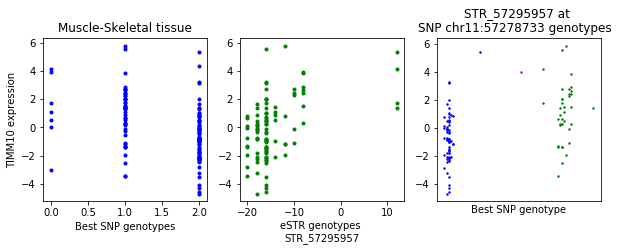


-----> chr12  gene  ENSG00000257727.1 ( CNPY2 )  Causality Score:  0.111318134358 
Counts by SNP genotypes
2 (4, 3)
0 (105, 3)
1 (15, 3)


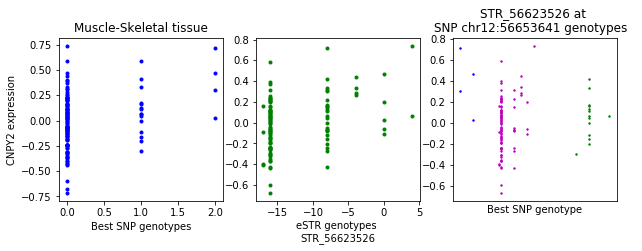


-----> chr17  gene  ENSG00000108264.12 ( TADA2A )  Causality Score:  0.225496446379 
Counts by SNP genotypes
2 (57, 3)
0 (13, 3)
1 (57, 3)


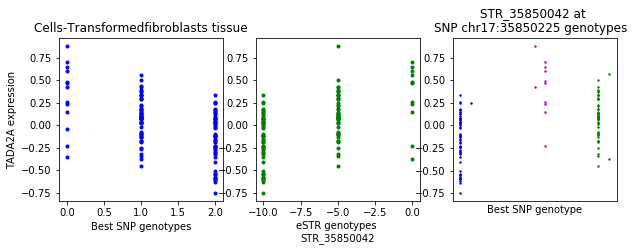


-----> chr17  gene  ENSG00000196689.6 ( TRPV1 )  Causality Score:  0.199726478548 
Counts by SNP genotypes
2 (4, 3)
0 (77, 3)
1 (43, 3)


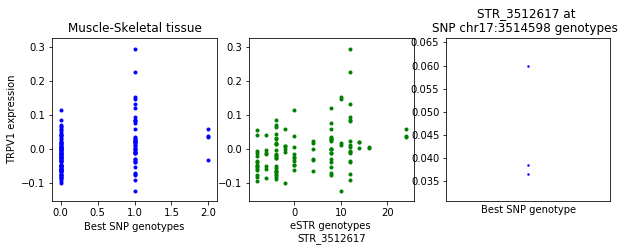


-----> chr19  gene  ENSG00000130175.5 ( PRKCSH )  Causality Score:  0.55173487006 
Counts by SNP genotypes
2 (3, 3)
0 (107, 3)
1 (17, 3)


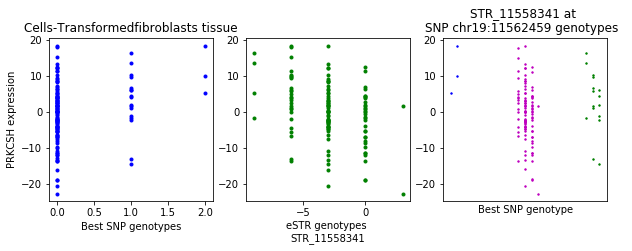


-----> chr20  gene  ENSG00000166913.8 ( YWHAB )  Causality Score:  0.166274184269 
Counts by SNP genotypes
2 (10, 3)
0 (68, 3)
1 (49, 3)


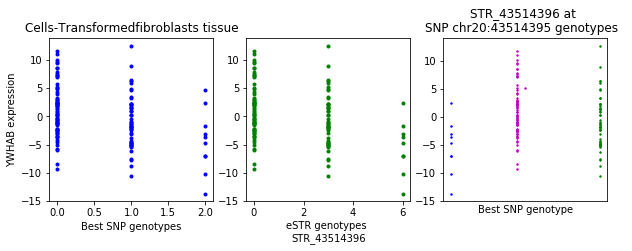

In [2]:
Gene_table = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/FEATURES/Genes_only_table', sep='\t')
Data = pd.read_csv(DATA, sep='\t')
data = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/SUMMARY/Merged_Causality_Features.tableII', sep='\t')
data1 = data.loc[data['EXON']==1]
data1 = data1.loc[(data1['best.q']<0.1)&(data['best.score']>=0.1)]#&(data['best.score']<=0.3)]
print(data1[['gene','best.q','best.score','best.str.start']])

for G in list(data1['gene']):
    data = Data.loc[Data['gene']==G]
    plotthat(data, BASEDIR)
    
#
#Not a lot of good examples here
#     check eSTRs effect at UTRs

** (2)   RNA binding proteins

In [ ]:
"""
Figure: Good example of eSTR on RNA binding proteins ()
        List of RBP
"""
FIGx